In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.3
sklearn: 0.22
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [4]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [5]:
#Importing data into dataframe
df =  pd.read_csv('C://Data/all.csv')

In [6]:
df.drop(['ph_PostMigratedHere','ph_UnknownSuggestionEvent','ph_QuestionMerged','ph_PostMigrated','ph_PostMigrated','p_Wiki','ph_QuestionUnmerged','ph_PostDisassociated','ph_SuggestedEditApplied','ph_UnknownDevRelatedEvent','ph_VoteNullificationByDev','ph_PostTweeted','ph_PostUnmigrated','ph_UnknownModeratorEvent','ph_UnknownEvent','ph_CommentDiscussionMovedToChat','p_PrivilegeWiki','p_WikiPlaceholder'], axis= 1, inplace=True);

In [8]:
def encode_features(df):
    feature = ['country']   
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
    return df
encode_features(df);

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_TagWiki,p_TagWikiExerpt,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination
0,7784035,2,1407.0,0.0,0,0,1,2,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9126518,2,622.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10021482,2,370.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2739419,2,400.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1440631,2,32.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5303365,2,1038.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4036517,2,30.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10955865,2,342.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8425017,2,124.0,0.0,0,0,1,1,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6607002,2,1366.0,0.0,0,0,1,0,1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


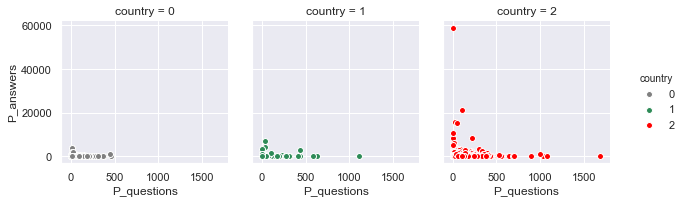

In [41]:
sns.set(font_scale=1)
g = sns.FacetGrid(df, hue="country",col="country", margin_titles=True,
                  palette={2:"red",1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "P_questions", "P_answers",edgecolor="w").add_legend();

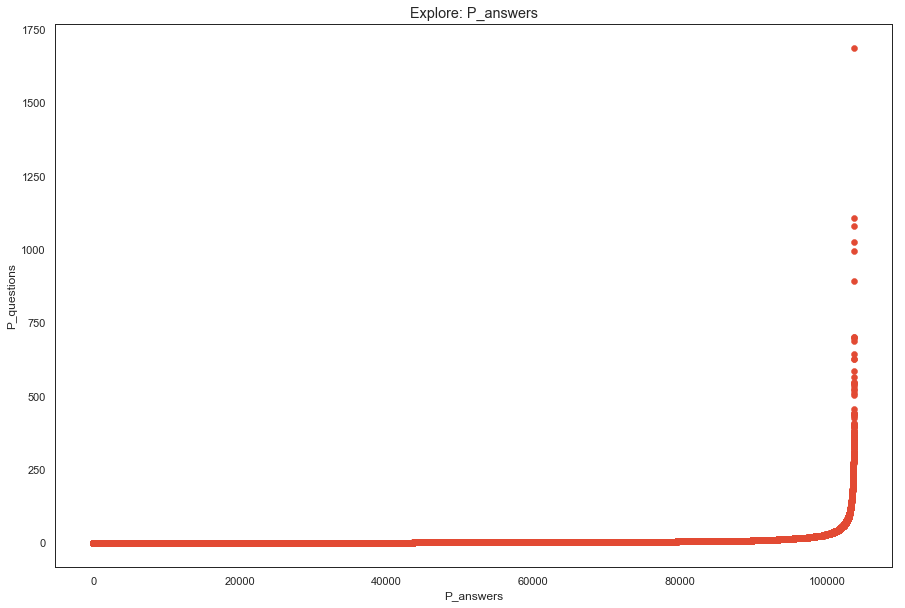

In [29]:
#show scatter plot with using Matplotlib
plt.figure(figsize=(15,10))
plt.scatter(range(df.shape[0]), np.sort(df['P_questions'].values))
plt.xlabel('P_answers')
plt.ylabel('P_questions')
plt.title('Explore: P_answers')
plt.show()

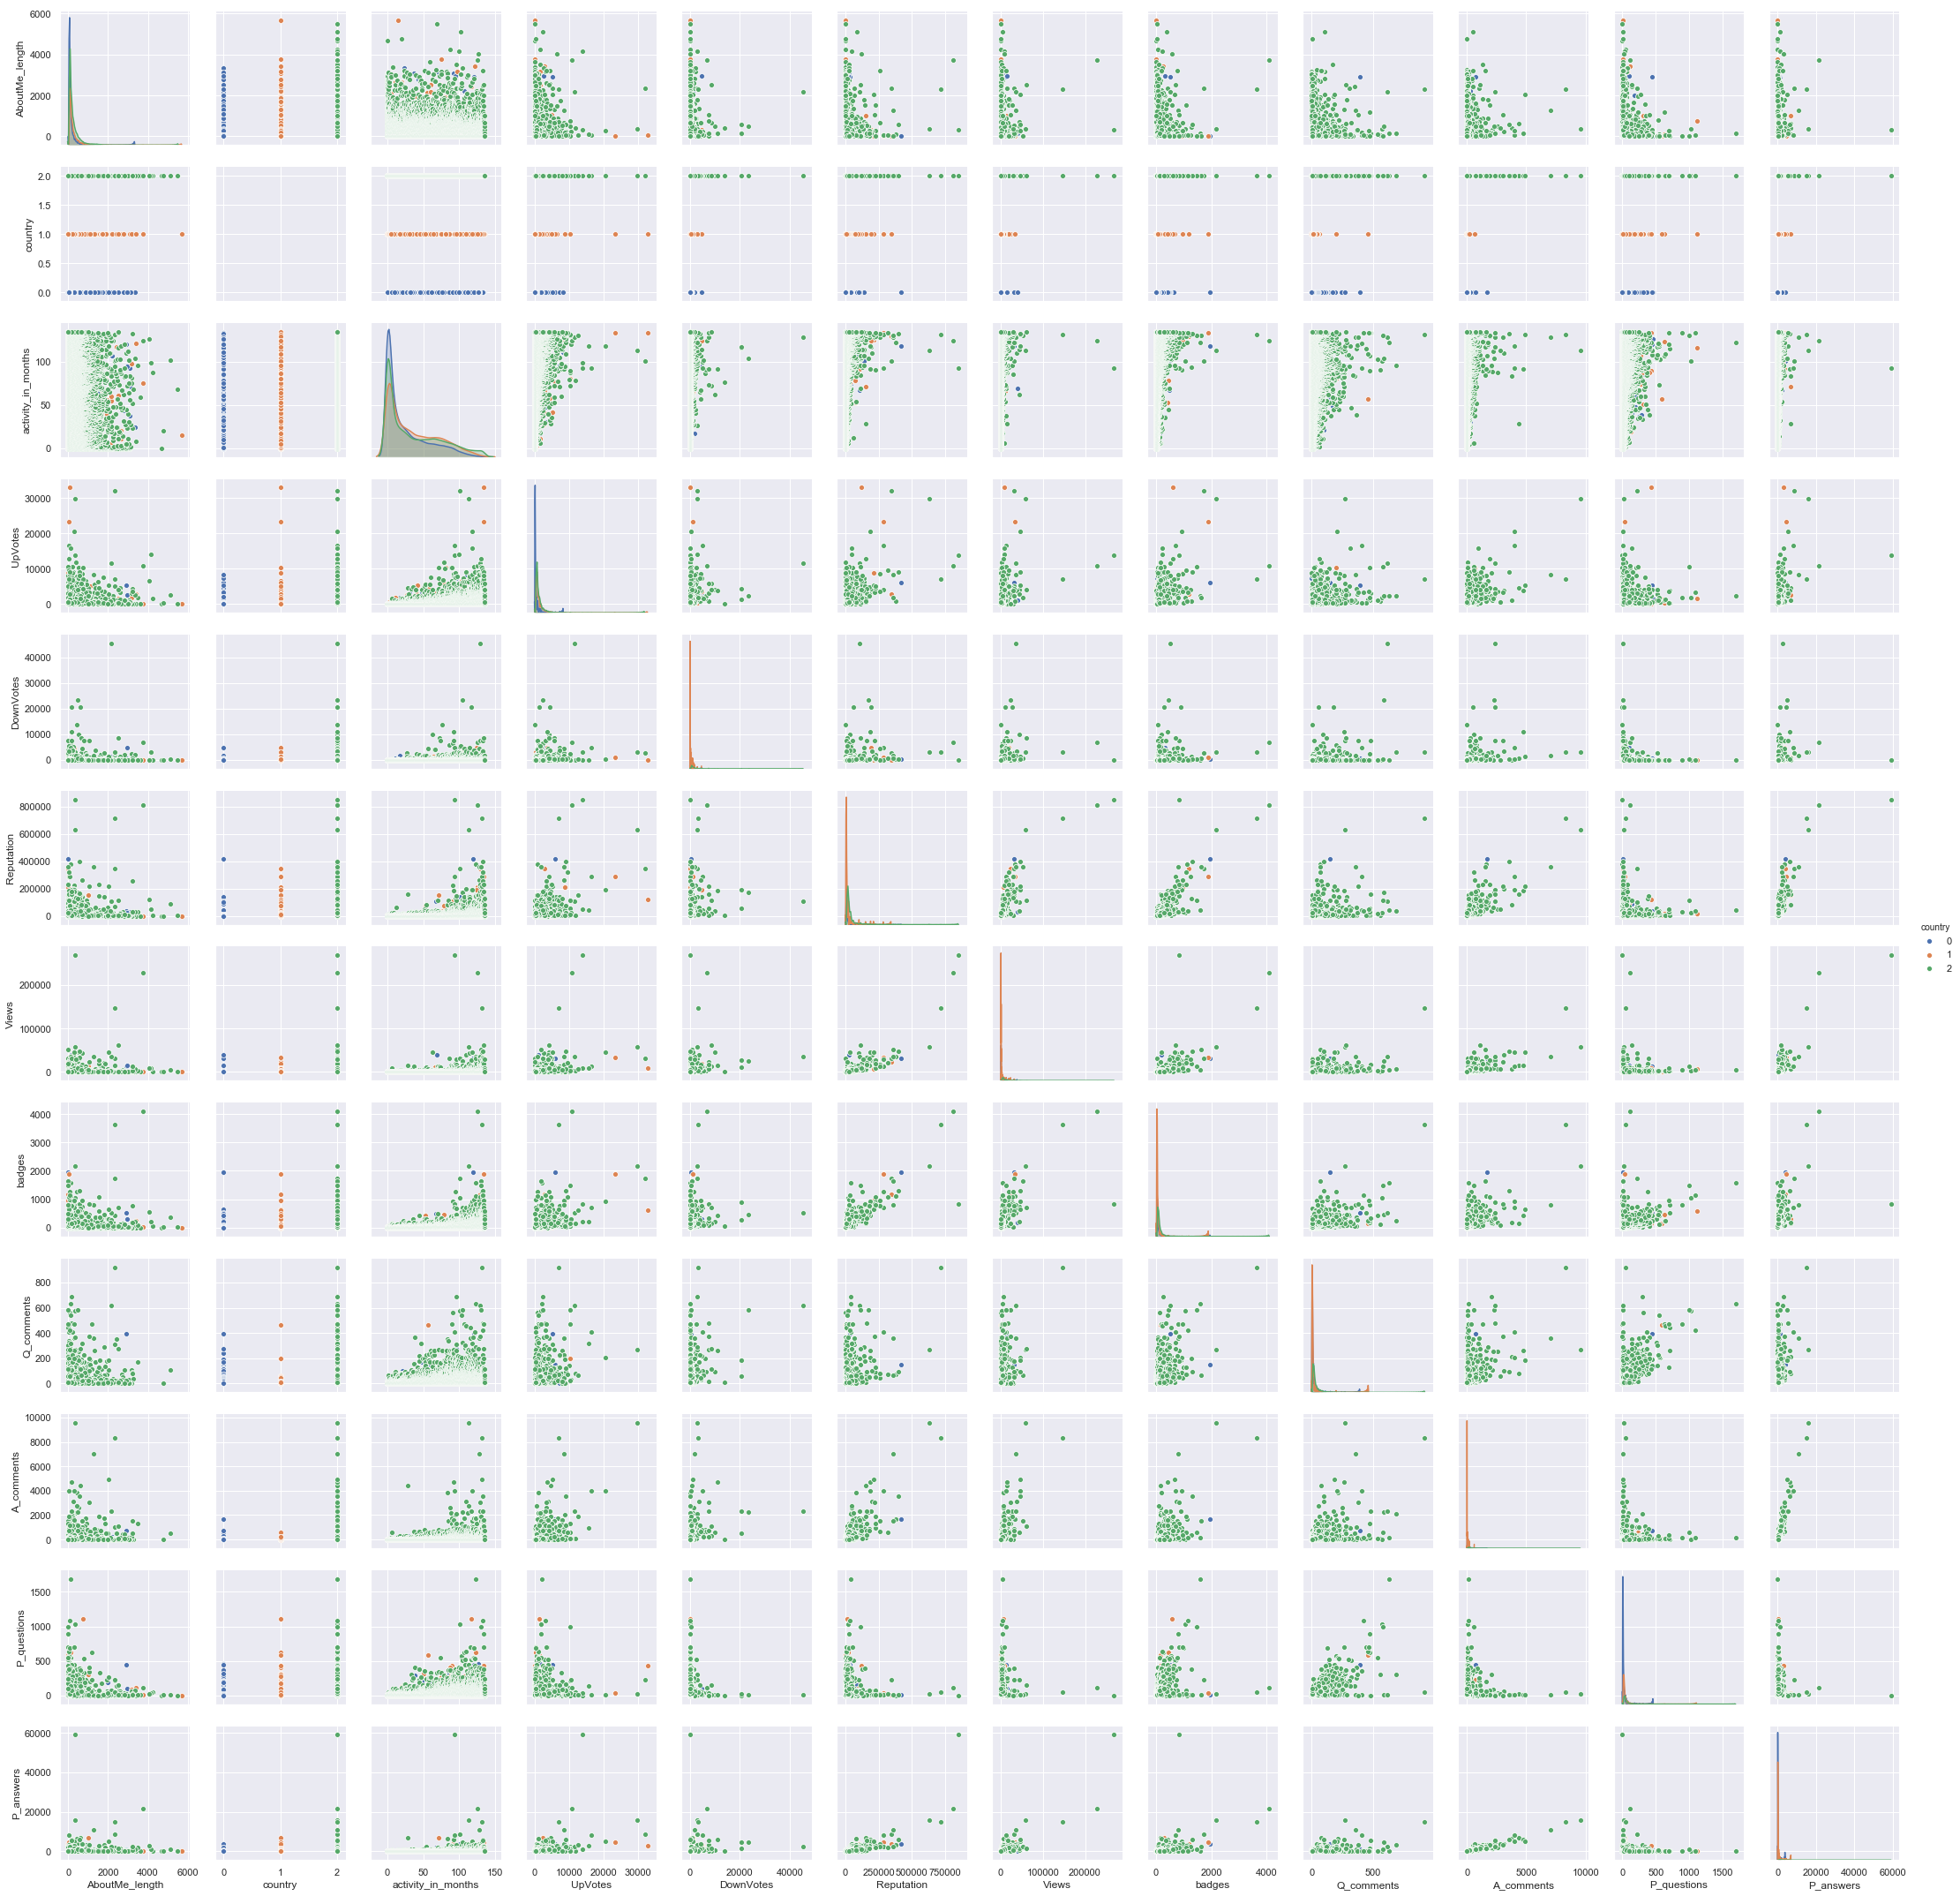

In [42]:
sns.set(font_scale=1)
sns.pairplot(data=df[['AboutMe_length','country','activity_in_months','UpVotes','DownVotes','Reputation','Views','badges','Q_comments','A_comments','P_questions','P_answers']],
             hue="country", dropna=True);

In [43]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
def check_missing_data(df)

SyntaxError: invalid syntax (<ipython-input-43-2204e2347410>, line 16)

In [ ]:
# df.head(100)

In [ ]:
# df.plot(kind='scatter', x='P_questions', y='P_answers',alpha = 0.5,color = 'red')

In [ ]:
# #show scatter plot with using Matplotlib
# plt.figure(figsize=(8,6))
# plt.scatter(range(df.shape[0]), np.sort(df['P_questions'].values))
# plt.xlabel('P_answers')
# plt.ylabel('P_questions')
# plt.title('Explore: P_questions')
# plt.show()

In [ ]:
# # histograms
# df.hist(figsize=(15,20));
# plt.figure();

In [ ]:
# def check_missing_data(df):
#     flag=df.isna().sum().any()
#     if flag==True:
#         total = df.isnull().sum()
#         percent = (df.isnull().sum())/(df.isnull().count()*100)
#         output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#         data_type = []
#         # written by MJ Bahmani
#         for col in df.columns:
#             dtype = str(df[col].dtype)
#             data_type.append(dtype)
#         output['Types'] = data_type
#         return(np.transpose(output))
#     else:
#         return(False)

In [ ]:
# check_missing_data(df)

In [ ]:
# df["country"].value_counts()

In [ ]:
# df.sample(10) 

In [ ]:
# statisitcal summary
# df.describe()

In [ ]:
# df.groupby('country').count()

In [ ]:
# def encode_features(df):
#     feature = ['country']   
#     le = preprocessing.LabelEncoder()
#     le = le.fit(df[feature])
#     df[feature] = le.transform(df[feature])
#     return df

In [ ]:
# encode_features(df)

In [ ]:
# df.fillna(0,inplace=True)

In [ ]:
# df.sample(10)

In [ ]:
# df.drop(['Id'], axis = 1,inplace=True)

In [ ]:
# pd.DataFrame(df).head()

In [ ]:
# Create training and testing sets
# df_train,df_test= train_test_split(df, test_size = 0.2, random_state = 0)

In [ ]:
# dependent_variable= "country"
# x= df_train[df_train.columns.difference([dependent_variable])]
# y = df_train[dependent_variable]
# lr = LogisticRegression()
# lr.fit(x,y)
# lr.score(x,y)